# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, preBN

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'bn':'pre'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 30.317s 


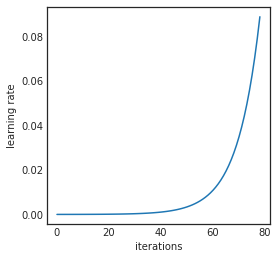

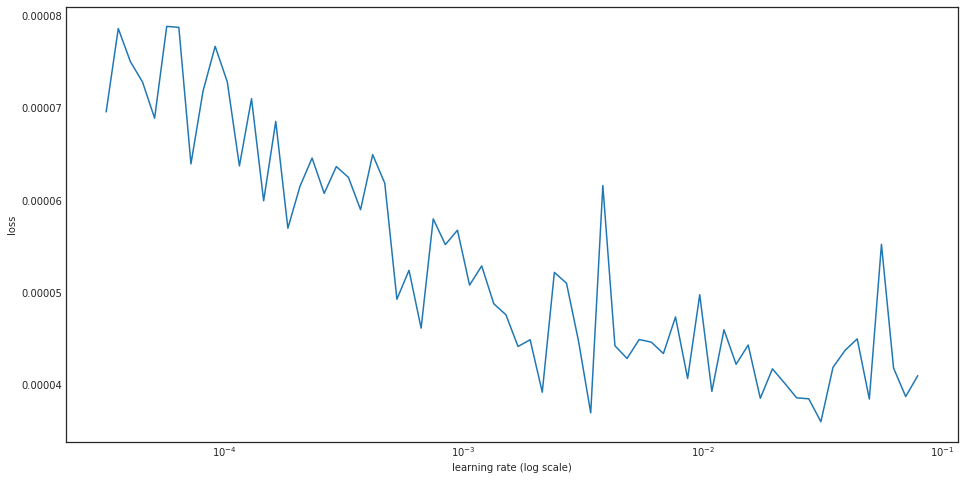

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.27719188035e-05
2 New best found: 3.80671407992e-05
3 New best found: 3.70673324329e-05
4 New best found: 3.63074782816e-05
5 New best found: 3.52333154536e-05
6 New best found: 3.4999462585e-05
7 New best found: 3.48511314868e-05
9 New best found: 3.46326660219e-05
10 New best found: 3.45703214414e-05
11 New best found: 3.45491680386e-05
12 New best found: 3.40297149529e-05
13 New best found: 3.39111088548e-05
14 New best found: 3.38278890757e-05
15 New best found: 3.38005274975e-05
20 New best found: 3.37370634402e-05
21 New best found: 3.34420367045e-05
23 New best found: 3.33489427319e-05
26 New best found: 3.33404388579e-05
27 New best found: 3.32833043161e-05
28 New best found: 3.31944718899e-05
29 New best found: 3.31738656009e-05
30 New best found: 3.31532360407e-05
48 New best found: 3.2958063061e-05
52 New best found: 3.28606671805e-05
57 New best fou

98 New best found: 3.21451611813e-05
99 New best found: 3.20115027651e-05
115 New best found: 3.19866629325e-05
119 New best found: 3.19752721933e-05
Early stopping after 179 epochs
Score is: {'loss': 3.1975272193261519e-05, 'AUC': 0.10138078702737041, 'wAUC': 0.063575317988377344}
Fold took 298.146s

Running fold 7 / 10
1 New best found: 4.33050581183e-05
2 New best found: 3.96504900427e-05
3 New best found: 3.75589191748e-05
4 New best found: 3.7478383564e-05
5 New best found: 3.54271032144e-05
6 New best found: 3.52892276825e-05
7 New best found: 3.52635959095e-05
9 New best found: 3.52601942559e-05
11 New best found: 3.4544499385e-05
12 New best found: 3.44346314616e-05
13 New best found: 3.43974252628e-05
14 New best found: 3.42134584825e-05
15 New best found: 3.42008933003e-05
21 New best found: 3.41735454675e-05
22 New best found: 3.40710491975e-05
23 New best found: 3.38729045083e-05
25 New best found: 3.38252882001e-05
26 New best found: 3.37817025224e-05
27 New best found: 3.

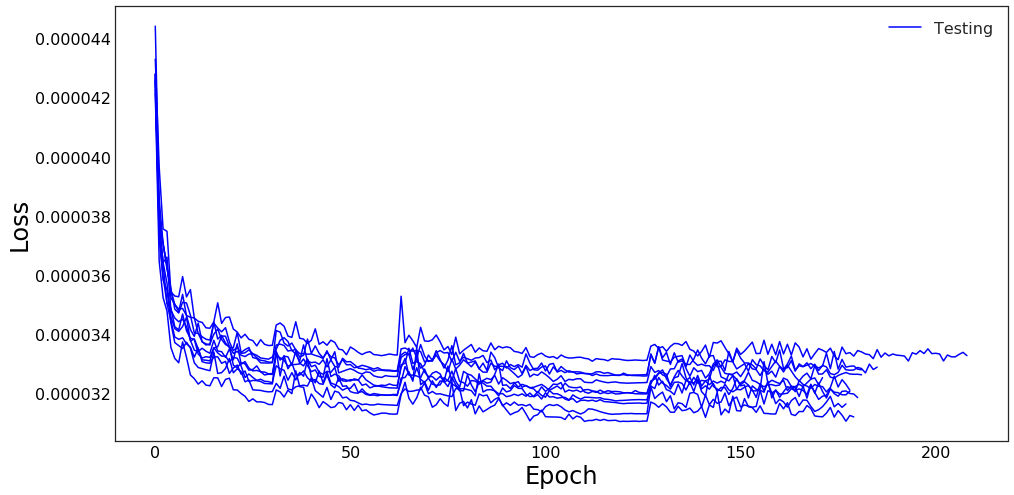

Mean wAUC = 0.0643 +- 0.0007
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.10438966124e-05
Model 1 is 9 with loss = 3.12879776299e-05
Model 2 is 8 with loss = 3.16491399085e-05
Model 3 is 3 with loss = 3.1740110005e-05
Model 4 is 5 with loss = 3.19752721933e-05
Model 5 is 1 with loss = 3.20000886863e-05
Model 6 is 4 with loss = 3.2341983964e-05
Model 7 is 0 with loss = 3.2583507937e-05
Model 8 is 7 with loss = 3.26029512794e-05
Model 9 is 6 with loss = 3.30585511134e-05


## Response on development data

In [10]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000596898703878s per sample

Predicting batch 2 out of 10
Prediction took 0.000338221292461s per sample

Predicting batch 3 out of 10
Prediction took 0.000355637328016s per sample

Predicting batch 4 out of 10
Prediction took 0.000326657605171s per sample

Predicting batch 5 out of 10
Prediction took 0.000331965792179s per sample

Predicting batch 6 out of 10
Prediction took 0.000348178648949s per sample

Predicting batch 7 out of 10
Prediction took 0.000345899307728s per sample

Predicting batch 8 out of 10
Prediction took 0.00033699254333s per sample

Predicting batch 9 out of 10
Prediction took 0.000333559823648s per sample

Predicting batch 10 out of 10
Prediction took 0.000337088595057s per sample



In [11]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.904024195343, weighted 0.940105716811


## Response on val data

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000339554405212s per sample

Predicting batch 2 out of 10
Prediction took 0.000330009794235s per sample

Predicting batch 3 out of 10
Prediction took 0.000364728593826s per sample

Predicting batch 4 out of 10
Prediction took 0.000367620182037s per sample

Predicting batch 5 out of 10
Prediction took 0.000506412982941s per sample

Predicting batch 6 out of 10
Prediction took 0.000455235004425s per sample

Predicting batch 7 out of 10
Prediction took 0.000331489562988s per sample

Predicting batch 8 out of 10
Prediction took 0.000326723814011s per sample

Predicting batch 9 out of 10
Prediction took 0.000407542610168s per sample

Predicting batch 10 out of 10
Prediction took 0.000334997367859s per sample



In [13]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901044662043, weighted 0.934806656516


## Evaluation

### Import in dataframe

In [15]:
valframe = convertToDF(valData)

50000 candidates loaded


In [16]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

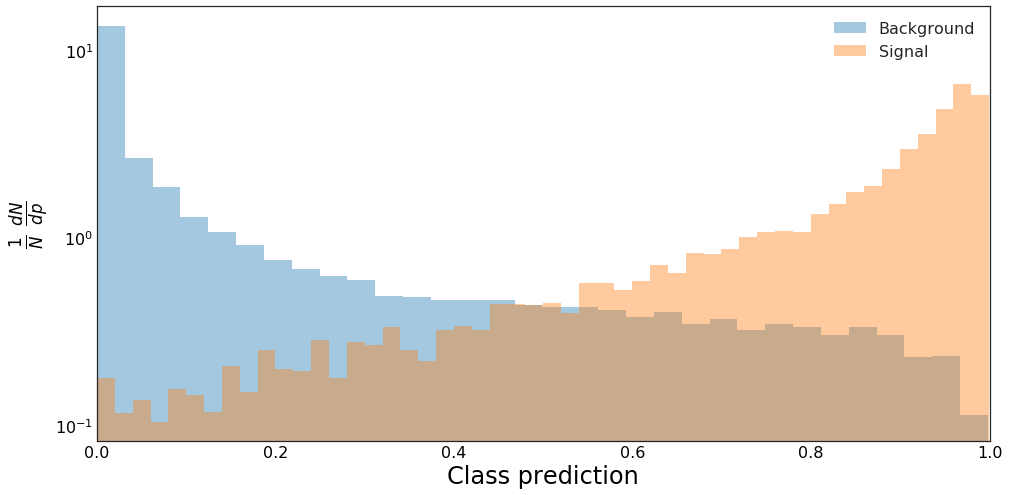

In [17]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [20]:
valframe['ams'] = amsScan(valframe)[0]

[0.91711342334747314, 1.6801446088401104]


In [21]:
bests = foldAMSScan(valframe, 10)

[0.97490996122360229, 2.491894532637951]
Fold 0, best AMS 2.49189453264 at cut of 0.974909961224. Total weights Signal:Bkg. 13.6413469315:8097.28320312


/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[0.89839929342269897, 1.4818825338684394]
Fold 1, best AMS 1.48188253387 at cut of 0.898399293423. Total weights Signal:Bkg. 14.4866523743:8236.44726562
[0.91829603910446167, 1.760668214068805]
Fold 2, best AMS 1.76066821407 at cut of 0.918296039104. Total weights Signal:Bkg. 13.8697214127:8156.33203125
[0.95171064138412476, 2.1144230938823565]
Fold 3, best AMS 2.11442309388 at cut of 0.951710641384. Total weights Signal:Bkg. 14.0146961212:8184.08691406
[0.97913122177124023, 2.902945979520697]
Fold 4, best AMS 2.90294597952 at cut of 0.979131221771. Total weights Signal:Bkg. 14.0445013046:8162.22802734
[0.92977499961853027, 1.7135492757876845]
Fold 5, best AMS 1.71354927579 at cut of 0.929774999619. Total weights Signal:Bkg. 13.4757785797:8167.65332031
[0.98602044582366943, 1.9494758996052974]
Fold 6, best AMS 1.94947589961 at cut of 0.986020445824. Total weights Signal:Bkg. 14.1829748154:8208.2578125
[0.97795403003692627, 2.1285836386925685]
Fold 7, best AMS 2.12858363869 at cut of 0.

In [22]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000337461038069s per sample

Predicting batch 2 out of 10
Prediction took 0.000330302815004s per sample

Predicting batch 3 out of 10
Prediction took 0.000326366164468s per sample

Predicting batch 4 out of 10
Prediction took 0.00034186947129s per sample

Predicting batch 5 out of 10
Prediction took 0.00033102236661s per sample

Predicting batch 6 out of 10
Prediction took 0.000324548565258s per sample

Predicting batch 7 out of 10
Prediction took 0.000331640694358s per sample

Predicting batch 8 out of 10
Prediction took 0.000336406070536s per sample

Predicting batch 9 out of 10
Prediction took 0.000325863621452s per sample

Predicting batch 10 out of 10
Prediction took 0.000322232710231s per sample



In [23]:
saveTest(0.953591364134, 'Day_6')

../Data/Day_6_test.csv


In [24]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6_pre_bn"

Successfully submitted to Higgs Boson Machine Learning Challenge